## Reto 11_12

## Parte 1

Datos descargados de Iran y Alemania para los años 2020 y 2021

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

Iran= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Reto11_12/Iran.csv",sep=",")

Iran.head()

FileNotFoundError: ignored

In [ ]:
Iran['Year'] = pd.to_numeric(Iran['Year'], errors='coerce')

NameError: ignored

In [ ]:
Iran['Value'] = pd.to_numeric(Iran['Value'], errors='coerce')

In [ ]:
Alemania= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Reto11_12/Germany.csv")

Alemania.head()

Country or Area  Year   Area         Sex    Age  \
0         Germany  2021  Total  Both Sexes  Total   
1         Germany  2021  Total  Both Sexes      0   
2         Germany  2021  Total  Both Sexes      1   
3         Germany  2021  Total  Both Sexes  1 - 4   
4         Germany  2021  Total  Both Sexes      2   

                            Record Type             Reliability  Source Year  \
0  Data tabulated by year of occurrence  Final figure, complete         2022   
1  Data tabulated by year of occurrence  Final figure, complete         2022   
2  Data tabulated by year of occurrence  Final figure, complete         2022   
3  Data tabulated by year of occurrence  Final figure, complete         2022   
4  Data tabulated by year of occurrence  Final figure, complete         2022   

     Value  Value Footnotes  
0  1023687              NaN  
1     2368              NaN  
2      167              NaN  
3      426              NaN  
4       86              NaN

In [ ]:
Alemania['Value'] = pd.to_numeric(Alemania['Value'], errors='coerce')

1)	Muertes por año por país

In [ ]:
Total_I=Iran[(Iran['Year'] == 2020) & (Iran['Year'] == 2021) | (Iran['Age'] == 'Total')& (Iran['Sex'] == 'Both Sexes')]
Total_I

Country or Area  Year   Area         Sex    Age  \
0   Iran (Islamic Republic of)   NaN  Total  Both Sexes  Total   
72  Iran (Islamic Republic of)   NaN  Total  Both Sexes  Total   

                               Record Type             Reliability  \
0   Data tabulated by year of registration  Final figure, complete   
72  Data tabulated by year of registration  Final figure, complete   

    Source Year     Value  Value Footnotes  
0        2023.0  520923.0              1.0  
72       2022.0  488132.0              1.0

In [ ]:
Total_A=Alemania[(Alemania['Year'] == 2020) & (Alemania['Year'] == 2021) | (Alemania['Age'] == 'Total')& (Alemania['Sex'] == 'Both Sexes')]
Total_A

Country or Area  Year   Area         Sex    Age  \
0           Germany  2021  Total  Both Sexes  Total   
366         Germany  2020  Total  Both Sexes  Total   

                              Record Type             Reliability  \
0    Data tabulated by year of occurrence  Final figure, complete   
366  Data tabulated by year of occurrence  Final figure, complete   

     Source Year    Value  Value Footnotes  
0           2022  1023687              NaN  
366         2022   985572              NaN

In [ ]:
print(Total_A.dtypes)

Country or Area     object
Year                 int64
Area                object
Sex                 object
Age                 object
Record Type         object
Reliability         object
Source Year          int64
Value                int64
Value Footnotes    float64
dtype: object


In [ ]:
print(Total_I.dtypes)

Country or Area     object
Year                object
Area                object
Sex                 object
Age                 object
Record Type         object
Reliability         object
Source Year        float64
Value              float64
Value Footnotes    float64
dtype: object


In [ ]:
Total_A['Value'] = Total_A['Value'].astype('int64')

<ipython-input-28-6f3f29bd6479>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Total_A['Value'] = Total_A['Value'].astype('int64')


In [ ]:
concatenated_df = pd.concat([Total_I, Total_A], axis=0)
concatenated_df

Country or Area  Year   Area         Sex    Age  \
0    Iran (Islamic Republic of)  2021  Total  Both Sexes  Total   
72   Iran (Islamic Republic of)  2020  Total  Both Sexes  Total   
0                       Germany  2021  Total  Both Sexes  Total   
366                     Germany  2020  Total  Both Sexes  Total   

                                Record Type             Reliability  \
0    Data tabulated by year of registration  Final figure, complete   
72   Data tabulated by year of registration  Final figure, complete   
0      Data tabulated by year of occurrence  Final figure, complete   
366    Data tabulated by year of occurrence  Final figure, complete   

     Source Year      Value  Value Footnotes  
0         2023.0   520923.0              1.0  
72        2022.0   488132.0              1.0  
0         2022.0  1023687.0              NaN  
366       2022.0   985572.0              NaN

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Year', y='Value', hue='Country or Area', data=concatenated_df)

plt.xlabel('Año')
plt.ylabel('Muertes')
plt.title('Muertes por año y pais')

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')


# Specify the position of the legend
plt.legend(title='Pais', loc='upper left')

plt.grid(True)
plt.show()

NameError: ignored

<Figure size 1000x600 with 0 Axes>

2)	Muertes por sexo por país

In [ ]:
Total_I=Iran[(Iran['Sex'] =='Male') & (Iran['Sex'] == 'Female') |(Iran['Age'] == 'Total')]
Total_I =Total_I [(Total_I['Sex'] != 'Both Sexes')]
Total_I

Country or Area    Year   Area     Sex    Age  \
24   Iran (Islamic Republic of)  2021.0  Total    Male  Total   
48   Iran (Islamic Republic of)  2021.0  Total  Female  Total   
91   Iran (Islamic Republic of)  2020.0  Total    Male  Total   
110  Iran (Islamic Republic of)  2020.0  Total  Female  Total   

                                Record Type             Reliability  \
24   Data tabulated by year of registration  Final figure, complete   
48   Data tabulated by year of registration  Final figure, complete   
91   Data tabulated by year of registration  Final figure, complete   
110  Data tabulated by year of registration  Final figure, complete   

     Source Year     Value  Value Footnotes  
24        2023.0  293914.0              1.0  
48        2023.0  227009.0              1.0  
91        2022.0  279024.0              1.0  
110       2022.0  209108.0              1.0

In [ ]:
Total_A=Alemania[(Alemania['Sex'] =='Male') & (Alemania['Sex'] == 'Female')|(Alemania['Age'] == 'Total')]
Total_A =Total_A [(Total_A['Sex'] != 'Both Sexes')]
Total_A

Country or Area  Year   Area     Sex    Age  \
122         Germany  2021  Total    Male  Total   
244         Germany  2021  Total  Female  Total   
501         Germany  2020  Total    Male  Total   
636         Germany  2020  Total  Female  Total   

                              Record Type             Reliability  \
122  Data tabulated by year of occurrence  Final figure, complete   
244  Data tabulated by year of occurrence  Final figure, complete   
501  Data tabulated by year of occurrence  Final figure, complete   
636  Data tabulated by year of occurrence  Final figure, complete   

     Source Year   Value  Value Footnotes  
122         2022  515559              NaN  
244         2022  508128              NaN  
501         2022  492797              NaN  
636         2022  492775              NaN

In [ ]:
concatenated_df = pd.concat([Total_I, Total_A], axis=0)
concatenated_df

Country or Area    Year   Area     Sex    Age  \
24   Iran (Islamic Republic of)  2021.0  Total    Male  Total   
48   Iran (Islamic Republic of)  2021.0  Total  Female  Total   
91   Iran (Islamic Republic of)  2020.0  Total    Male  Total   
110  Iran (Islamic Republic of)  2020.0  Total  Female  Total   
122                     Germany  2021.0  Total    Male  Total   
244                     Germany  2021.0  Total  Female  Total   
501                     Germany  2020.0  Total    Male  Total   
636                     Germany  2020.0  Total  Female  Total   

                                Record Type             Reliability  \
24   Data tabulated by year of registration  Final figure, complete   
48   Data tabulated by year of registration  Final figure, complete   
91   Data tabulated by year of registration  Final figure, complete   
110  Data tabulated by year of registration  Final figure, complete   
122    Data tabulated by year of occurrence  Final figure, complete   
244    Data tabulated by year of occurrence  Final figure, complete   
501    Data tabulated by year of occurrence  Final figure, complete   
636    Data tabulated by year of occurrence  Final figure, complete   

     Source Year     Value  Value Footnotes  
24        2023.0  293914.0              1.0  
48        2023.0  227009.0              1.0  
91        2022.0  279024.0              1.0  
110       2022.0  209108.0              1.0  
122       2022.0  515559.0              NaN  
244       2022.0  508128.0              NaN  
501       2022.0  492797.0              NaN  
636       2022.0  492775.0              NaN

In [ ]:
Total_2020=concatenated_df[(concatenated_df['Year'] == 2020)]
Total_2020

Country or Area    Year   Area     Sex    Age  \
91   Iran (Islamic Republic of)  2020.0  Total    Male  Total   
110  Iran (Islamic Republic of)  2020.0  Total  Female  Total   
501                     Germany  2020.0  Total    Male  Total   
636                     Germany  2020.0  Total  Female  Total   

                                Record Type             Reliability  \
91   Data tabulated by year of registration  Final figure, complete   
110  Data tabulated by year of registration  Final figure, complete   
501    Data tabulated by year of occurrence  Final figure, complete   
636    Data tabulated by year of occurrence  Final figure, complete   

     Source Year     Value  Value Footnotes  
91        2022.0  279024.0              1.0  
110       2022.0  209108.0              1.0  
501       2022.0  492797.0              NaN  
636       2022.0  492775.0              NaN

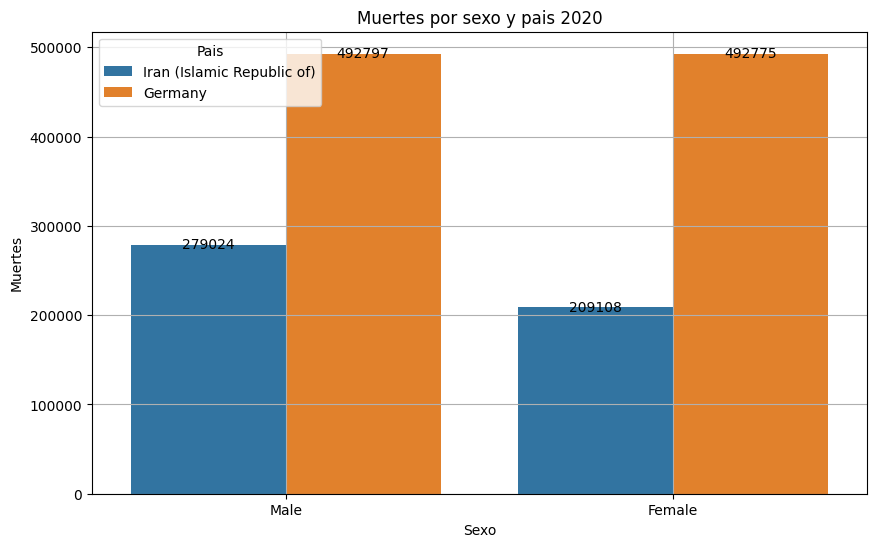

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Sex', y='Value', hue='Country or Area', data=Total_2020)

plt.xlabel('Sexo')
plt.ylabel('Muertes')
plt.title('Muertes por sexo y pais 2020')

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')


# Specify the position of the legend
plt.legend(title='Pais', loc='upper left')

plt.grid(True)
plt.show()

In [ ]:
Total_2021=concatenated_df[(concatenated_df['Year'] == 2021)]
Total_2021

Country or Area    Year   Area     Sex    Age  \
24   Iran (Islamic Republic of)  2021.0  Total    Male  Total   
48   Iran (Islamic Republic of)  2021.0  Total  Female  Total   
122                     Germany  2021.0  Total    Male  Total   
244                     Germany  2021.0  Total  Female  Total   

                                Record Type             Reliability  \
24   Data tabulated by year of registration  Final figure, complete   
48   Data tabulated by year of registration  Final figure, complete   
122    Data tabulated by year of occurrence  Final figure, complete   
244    Data tabulated by year of occurrence  Final figure, complete   

     Source Year     Value  Value Footnotes  
24        2023.0  293914.0              1.0  
48        2023.0  227009.0              1.0  
122       2022.0  515559.0              NaN  
244       2022.0  508128.0              NaN

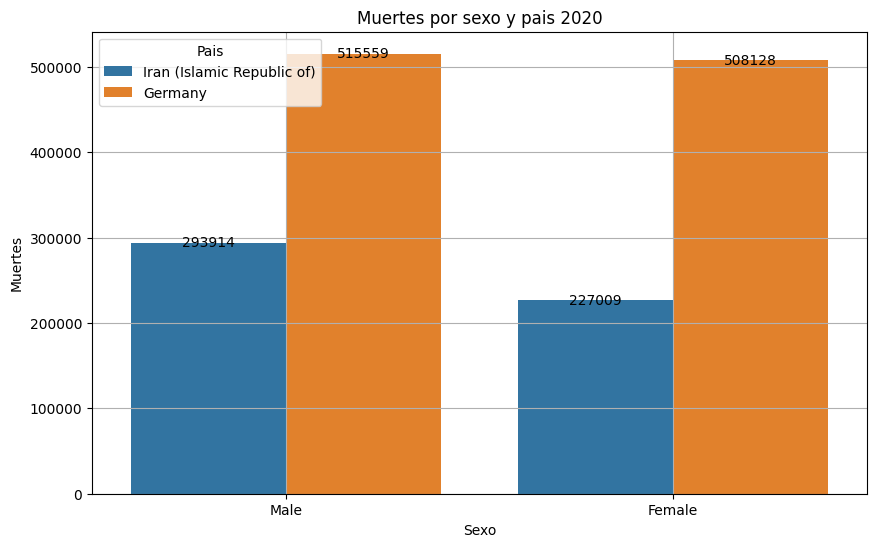

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Sex', y='Value', hue='Country or Area', data=Total_2021)

plt.xlabel('Sexo')
plt.ylabel('Muertes')
plt.title('Muertes por sexo y pais 2020')

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')


# Specify the position of the legend
plt.legend(title='Pais', loc='upper left')

plt.grid(True)
plt.show()

3)	Muertes por edad por país

In [ ]:
Total_I=Iran[(Iran['Age'] !='Total') & (Iran['Age'] !='Unknown') &(Iran['Sex'] =='Both Sexes')]
Total_I

Country or Area    Year   Area         Sex      Age  \
1   Iran (Islamic Republic of)  2021.0  Total  Both Sexes        0   
2   Iran (Islamic Republic of)  2021.0  Total  Both Sexes    1 - 4   
3   Iran (Islamic Republic of)  2021.0  Total  Both Sexes    5 - 9   
4   Iran (Islamic Republic of)  2021.0  Total  Both Sexes  10 - 14   
5   Iran (Islamic Republic of)  2021.0  Total  Both Sexes  15 - 19   
6   Iran (Islamic Republic of)  2021.0  Total  Both Sexes  20 - 24   
7   Iran (Islamic Republic of)  2021.0  Total  Both Sexes  25 - 29   
8   Iran (Islamic Republic of)  2021.0  Total  Both Sexes  30 - 34   
9   Iran (Islamic Republic of)  2021.0  Total  Both Sexes  35 - 39   
10  Iran (Islamic Republic of)  2021.0  Total  Both Sexes  40 - 44   
11  Iran (Islamic Republic of)  2021.0  Total  Both Sexes  45 - 49   
12  Iran (Islamic Republic of)  2021.0  Total  Both Sexes  50 - 54   
13  Iran (Islamic Republic of)  2021.0  Total  Both Sexes  55 - 59   
14  Iran (Islamic Republic of)  2021.0  Total  Both Sexes  60 - 64   
15  Iran (Islamic Republic of)  2021.0  Total  Both Sexes  65 - 69   
16  Iran (Islamic Republic of)  2021.0  Total  Both Sexes  70 - 74   
17  Iran (Islamic Republic of)  2021.0  Total  Both Sexes  75 - 79   
18  Iran (Islamic Republic of)  2021.0  Total  Both Sexes  80 - 84   
19  Iran (Islamic Republic of)  2021.0  Total  Both Sexes  85 - 89   
20  Iran (Islamic Republic of)  2021.0  Total  Both Sexes  90 - 94   
21  Iran (Islamic Republic of)  2021.0  Total  Both Sexes  95 - 99   
22  Iran (Islamic Republic of)  2021.0  Total  Both Sexes    100 +   
73  Iran (Islamic Republic of)  2020.0  Total  Both Sexes        0   
74  Iran (Islamic Republic of)  2020.0  Total  Both Sexes    1 - 4   
75  Iran (Islamic Republic of)  2020.0  Total  Both Sexes    5 - 9   
76  Iran (Islamic Republic of)  2020.0  Total  Both Sexes  10 - 14   
77  Iran (Islamic Republic of)  2020.0  Total  Both Sexes  15 - 19   
78  Iran (Islamic Republic of)  2020.0  Total  Both Sexes  20 - 24   
79  Iran (Islamic Republic of)  2020.0  Total  Both Sexes  25 - 29   
80  Iran (Islamic Republic of)  2020.0  Total  Both Sexes  30 - 34   
81  Iran (Islamic Republic of)  2020.0  Total  Both Sexes  35 - 39   
82  Iran (Islamic Republic of)  2020.0  Total  Both Sexes  40 - 44   
83  Iran (Islamic Republic of)  2020.0  Total  Both Sexes  45 - 49   
84  Iran (Islamic Republic of)  2020.0  Total  Both Sexes  50 - 54   
85  Iran (Islamic Republic of)  2020.0  Total  Both Sexes  55 - 59   
86  Iran (Islamic Republic of)  2020.0  Total  Both Sexes  60 - 64   
87  Iran (Islamic Republic of)  2020.0  Total  Both Sexes  65 - 69   
88  Iran (Islamic Republic of)  2020.0  Total  Both Sexes  70 - 74   
89  Iran (Islamic Republic of)  2020.0  Total  Both Sexes     75 +   

                               Record Type             Reliability  \
1   Data tabulated by year of registration  Final figure, complete   
2   Data tabulated by year of registration  Final figure, complete   
3   Data tabulated by year of registration  Final figure, complete   
4   Data tabulated by year of registration  Final figure, complete   
5   Data tabulated by year of registration  Final figure, complete   
6   Data tabulated by year of registration  Final figure, complete   
7   Data tabulated by year of registration  Final figure, complete   
8   Data tabulated by year of registration  Final figure, complete   
9   Data tabulated by year of registration  Final figure, complete   
10  Data tabulated by year of registration  Final figure, complete   
11  Data tabulated by year of registration  Final figure, complete   
12  Data tabulated by year of registration  Final figure, complete   
13  Data tabulated by year of registration  Final figure, complete   
14  Data tabulated by year of registration  Final figure, complete   
15  Data tabulated by year of registration  Final figure, complete   
16  Data tabulated by year of registration  Final figure, complete   
17  Data tabulated by ye

In [ ]:
print(Total_I.dtypes)

Country or Area     object
Year               float64
Area                object
Sex                 object
Age                 object
Record Type         object
Reliability         object
Source Year        float64
Value              float64
Value Footnotes    float64
dtype: object


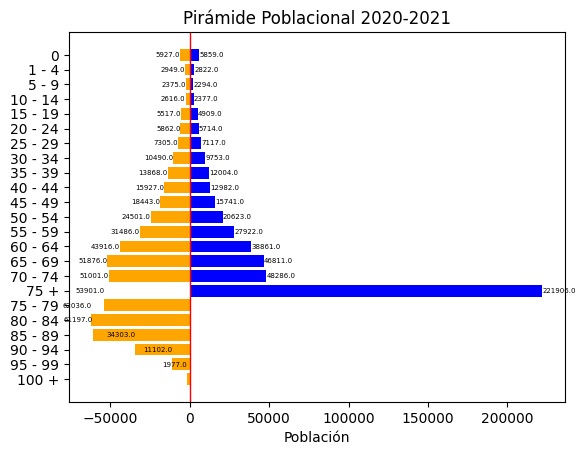

In [ ]:
df_2020 = Total_I[Total_I['Year'] == 2020.0]
df_2021 = Total_I[Total_I['Year'] == 2021.0]

# Crear una figura y un eje para la pirámide poblacional
fig, ax = plt.subplots()

# Dibujar barras para 2020 (lado izquierdo de la pirámide) con etiquetas
for i, row in enumerate(df_2020.iterrows()):
    _, data = row
    ax.barh(data['Age'], data['Value'], color='blue', label='2020')
    ax.text(data['Value'], i, str(data['Value']), ha='left', va='center', fontsize=5, color='black')

# Dibujar barras para 2021 (lado derecho de la pirámide) con etiquetas
for i, row in enumerate(df_2021.iterrows()):
    _, data = row
    ax.barh(data['Age'], -data['Value'], color='orange', label='2021')
    ax.text(-data['Value'], i, str(data['Value']), ha='right', va='center', fontsize=5, color='black')

# Configurar etiquetas y título
ax.set_xlabel('Población')
ax.set_title('Pirámide Poblacional 2020-2021')

# Añadir una línea vertical en el centro
ax.axvline(0, color='red', linewidth=1)

# Invertir el eje y para mostrar los grupos de edad en orden descendente
ax.invert_yaxis()

# Añadir una leyenda
#ax.legend(title='Año')

# Mostrar la pirámide poblacional
plt.show()


In [ ]:
Total_A=Alemania[(Alemania['Age'] !='Total') & (Alemania['Age'] !='Unknown') &(Alemania['Sex'] =='Both Sexes')]
Total_A

Country or Area  Year   Area         Sex    Age  \
1           Germany  2021  Total  Both Sexes      0   
2           Germany  2021  Total  Both Sexes      1   
3           Germany  2021  Total  Both Sexes  1 - 4   
4           Germany  2021  Total  Both Sexes      2   
5           Germany  2021  Total  Both Sexes      3   
..              ...   ...    ...         ...    ...   
496         Germany  2020  Total  Both Sexes    106   
497         Germany  2020  Total  Both Sexes    107   
498         Germany  2020  Total  Both Sexes    108   
499         Germany  2020  Total  Both Sexes    109   
500         Germany  2020  Total  Both Sexes  110 +   

                              Record Type             Reliability  \
1    Data tabulated by year of occurrence  Final figure, complete   
2    Data tabulated by year of occurrence  Final figure, complete   
3    Data tabulated by year of occurrence  Final figure, complete   
4    Data tabulated by year of occurrence  Final figure, complete   
5    Data tabulated by year of occurrence  Final figure, complete   
..                                    ...                     ...   
496  Data tabulated by year of occurrence  Final figure, complete   
497  Data tabulated by year of occurrence  Final figure, complete   
498  Data tabulated by year of occurrence  Final figure, complete   
499  Data tabulated by year of occurrence  Final figure, complete   
500  Data tabulated by year of occurrence  Final figure, complete   

     Source Year  Value  Value Footnotes  
1           2022   2368              NaN  
2           2022    167              NaN  
3           2022    426              NaN  
4           2022     86              NaN  
5           2022     91              NaN  
..           ...    ...              ...  
496         2022    136              NaN  
497         2022     69              NaN  
498         2022     26              NaN  
499         2022     17              NaN  
500         2022     14              NaN  

[255 rows x 10 columns]

In [ ]:
### Agrupar por grupos de edad y luego hacer un groupby que sume values

In [ ]:
# Define una función para recodificar valores en grupos de edad de 5 años
def recodificar_edad(valor):
    if isinstance(valor, int):
        grupo_edad = (valor // 5) * 5  # Redondear a múltiplo de 5
        return f'{grupo_edad}-{grupo_edad + 4}'
    else:
        return valor


In [ ]:
# Aplicar la función a la columna 'edad'
Total_A['Age'] = Total_A['Age'].apply(recodificar_edad)

<ipython-input-12-5f4c7ab7937c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Total_A['Age'] = Total_A['Age'].apply(recodificar_edad)


In [ ]:
Total_A.head()

Country or Area  Year   Area         Sex    Age  \
1         Germany  2021  Total  Both Sexes      0   
2         Germany  2021  Total  Both Sexes      1   
3         Germany  2021  Total  Both Sexes  1 - 4   
4         Germany  2021  Total  Both Sexes      2   
5         Germany  2021  Total  Both Sexes      3   

                            Record Type             Reliability  Source Year  \
1  Data tabulated by year of occurrence  Final figure, complete         2022   
2  Data tabulated by year of occurrence  Final figure, complete         2022   
3  Data tabulated by year of occurrence  Final figure, complete         2022   
4  Data tabulated by year of occurrence  Final figure, complete         2022   
5  Data tabulated by year of occurrence  Final figure, complete         2022   

   Value  Value Footnotes  
1   2368              NaN  
2    167              NaN  
3    426              NaN  
4     86              NaN  
5     91              NaN

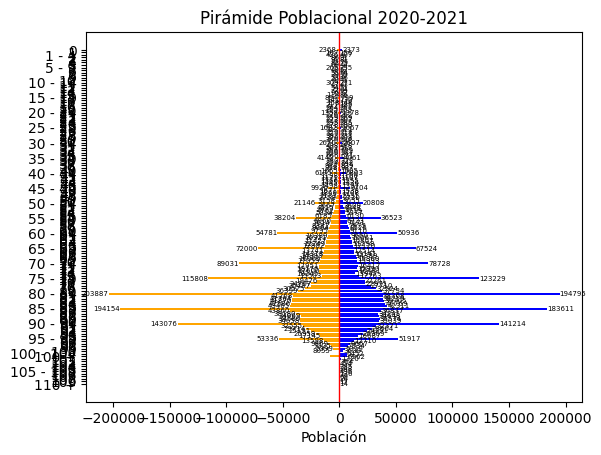

In [ ]:
df_2020 = Total_A[Total_A['Year'] == 2020.0]
df_2021 = Total_A[Total_A['Year'] == 2021.0]

# Crear una figura y un eje para la pirámide poblacional
fig, ax = plt.subplots()

# Dibujar barras para 2020 (lado izquierdo de la pirámide) con etiquetas
for i, row in enumerate(df_2020.iterrows()):
    _, data = row
    ax.barh(data['Age'], data['Value'], color='blue', label='2020')
    ax.text(data['Value'], i, str(data['Value']), ha='left', va='center', fontsize=5, color='black')

# Dibujar barras para 2021 (lado derecho de la pirámide) con etiquetas
for i, row in enumerate(df_2021.iterrows()):
    _, data = row
    ax.barh(data['Age'], -data['Value'], color='orange', label='2021')
    ax.text(-data['Value'], i, str(data['Value']), ha='right', va='center', fontsize=5, color='black')

# Configurar etiquetas y título
ax.set_xlabel('Población')
ax.set_title('Pirámide Poblacional 2020-2021')

# Añadir una línea vertical en el centro
ax.axvline(0, color='red', linewidth=1)

# Invertir el eje y para mostrar los grupos de edad en orden descendente
ax.invert_yaxis()

# Añadir una leyenda
#ax.legend(title='Año')

# Mostrar la pirámide poblacional
plt.show()


## Parte 2

El FBI lo contrata para realizar un proceso de análisis exploratorio científico sobre un histórico de homicidios reales en Estados Unidos, del cual desea lo siguiente información:



Cargar las información de homicidios del reto 9

In [5]:
import pandas as pd

datoscrime= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Reto9/database.csv")

datoscrime.head()
Total_datoscrime = datoscrime[(datoscrime['Perpetrator Sex'] !='Unknown')]
#crimenesGenero_Raza=datoscrime[(datoscrime['Perpetrator Sex'] !='Unknown') &(datoscrime['Perpetrator Race'] !='Unknown')]

Total_datoscrime.head(50)
#crimenesGenero_Raza.head()

<ipython-input-5-5056e19cbcbe>:3: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  datoscrime= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Reto9/database.csv")


Record ID Agency Code          Agency Name       Agency Type  \
0           1     AK00101            Anchorage  Municipal Police   
1           2     AK00101            Anchorage  Municipal Police   
3           4     AK00101            Anchorage  Municipal Police   
5           6     AK00101            Anchorage  Municipal Police   
6           7     AK00101            Anchorage  Municipal Police   
7           8     AK00101            Anchorage  Municipal Police   
9          10     AK00101            Anchorage  Municipal Police   
11         12     AK00101            Anchorage  Municipal Police   
12         13     AK00101            Anchorage  Municipal Police   
13         14     AK00101            Anchorage  Municipal Police   
15         16     AK00101            Anchorage  Municipal Police   
16         17     AK00101            Anchorage  Municipal Police   
17         18     AK00103               Juneau  Municipal Police   
18         19     AK00106                 Nome  Municipal Police   
19         20     AK00113               Bethel  Municipal Police   
20         21     AK00118  North Slope Borough     County Police   
21         22     AK00118  North Slope Borough     County Police   
22         23     AK00118  North Slope Borough     County Police   
23         24     AK00118  North Slope Borough     County Police   
24         25     AK00118  North Slope Borough     County Police   
25         26     AK00123                Kenai  Municipal Police   
27         28     AKASP00  Alaska State Police      State Police   
28         29     AKASP00  Alaska State Police      State Police   
29         30     AKASP00  Alaska State Police      State Police   
30         31     AKASP00  Alaska State Police      State Police   
31         32     AKASP00  Alaska State Police      State Police   
35         36     AKASP00  Alaska State Police      State Police   
36         37     AKASP00  Alaska State Police      State Police   
37         38     AKASP00  Alaska State Police      State Police   
39         40     AKASP00  Alaska State Police      State Police   
40         41     AKASP00  Alaska State Police      State Police   
41         42     AKASP00  Alaska State Police      State Police   
42         43     AKASP00  Alaska State Police      State Police   
43         44     AKASP00  Alaska State Police      State Police   
44         45     AKASP00  Alaska State Police      State Police   
45         46     AKASP00  Alaska State Police      State Police   
46         47     AKASP00  Alaska State Police      State Police   
47         48     AL00100            Jefferson           Sheriff   
48         49     AL00100            Jefferson           Sheriff   
49         50     AL00100            Jefferson           Sheriff   
50         51     AL00100            Jefferson           Sheriff   
51         52     AL00100            Jefferson           Sheriff   
52         53     AL00100            Jefferson           Sheriff   
53         54     AL00100            Jefferson           Sheriff   
54         55     AL00100            Jefferson           Sheriff   
56         57     AL00100            Jefferson           Sheriff   
57         58     AL00100            Jefferson           Sheriff   
58         59     AL00100            Jefferson           Sheriff   
60         61     AL00100            Jefferson           Sheriff   
61         62     AL00100            Jefferson           Sheriff   

               City    State  Year      Month  Incident  \
0         Anchorage   Alaska  1980    January         1   
1         Anchorage   Alaska  1980      March         1   
3         Anchorage   Alaska  1980      April         1   
5         Anchorage   Alaska  1980        May         1   
6         Anchorage   Alaska  1980        May         2   
7         Anchorage   Alaska  1980       June         1   
9         Anchorage   Alaska  1980       June         3   
11        Anchorage   Alaska  1980       July         2   
12  

In [ ]:
column_names = Total_datoscrime.columns
column_names

Index(['Record ID', 'Agency Code', 'Agency Name', 'Agency Type', 'City',
       'State', 'Year', 'Month', 'Incident', 'Crime Type', 'Crime Solved',
       'Victim Sex', 'Victim Age', 'Victim Race', 'Victim Ethnicity',
       'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race',
       'Perpetrator Ethnicity', 'Relationship', 'Weapon', 'Victim Count',
       'Perpetrator Count', 'Record Source'],
      dtype='object')

1)	Graficar los estados más afectados por crímenes perpetrados de acuerdo al sexo.


In [ ]:
from matplotlib.ticker import FuncFormattermerged_data.head()

State  Female   Male
0     Alabama    1348   7628
1      Alaska     166   1154
2     Arizona     774   8454
3    Arkansas     826   5016
4  California    5215  58199

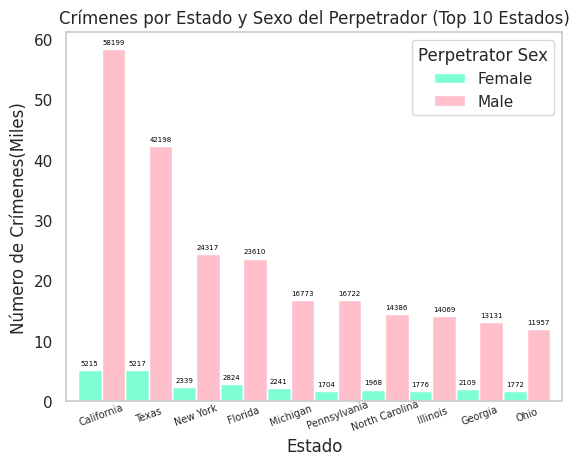

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
# Supongamos que tu DataFrame se llama 'Total_datoscrime'

# Agrupación y conteo por estado y sexo del perpetrador
data = Total_datoscrime.groupby(['State', 'Perpetrator Sex']).size().unstack()

# Obtener los 10 estados con más crímenes
top_10_states = data.sum(axis=1).nlargest(10).index
data_top_10 = data.loc[top_10_states]

# Colores personalizados
colors = ['aquamarine', 'pink']

# Gráfico de barras personalizado
ax = data_top_10.plot(kind='bar', width=1, color=colors)

# Ajusta el tamaño del eje X
plt.xticks(rotation=0)  # Establece el ángulo de rotación del texto del eje X a 0 grados

# Ajusta las etiquetas de las barras
for container in ax.containers:
    ax.bar_label(container, fontsize=5, color='black', weight='normal', label_type='edge', padding=3)

# Añade etiquetas de estado en orientación vertical
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, fontsize=7, va='center')

# Desactiva el grid
ax.grid(False)

# Personaliza el eje Y para mostrar valores en formato abreviado (sin miles)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x/1000:.0f}"))

plt.title("Crímenes por Estado y Sexo del Perpetrador (Top 10 Estados)")
plt.xlabel("Estado")
plt.ylabel("Número de Crímenes(Miles)")
plt.show()

2)	Graficar el número de crímenes de acuerdo al género y la raza.

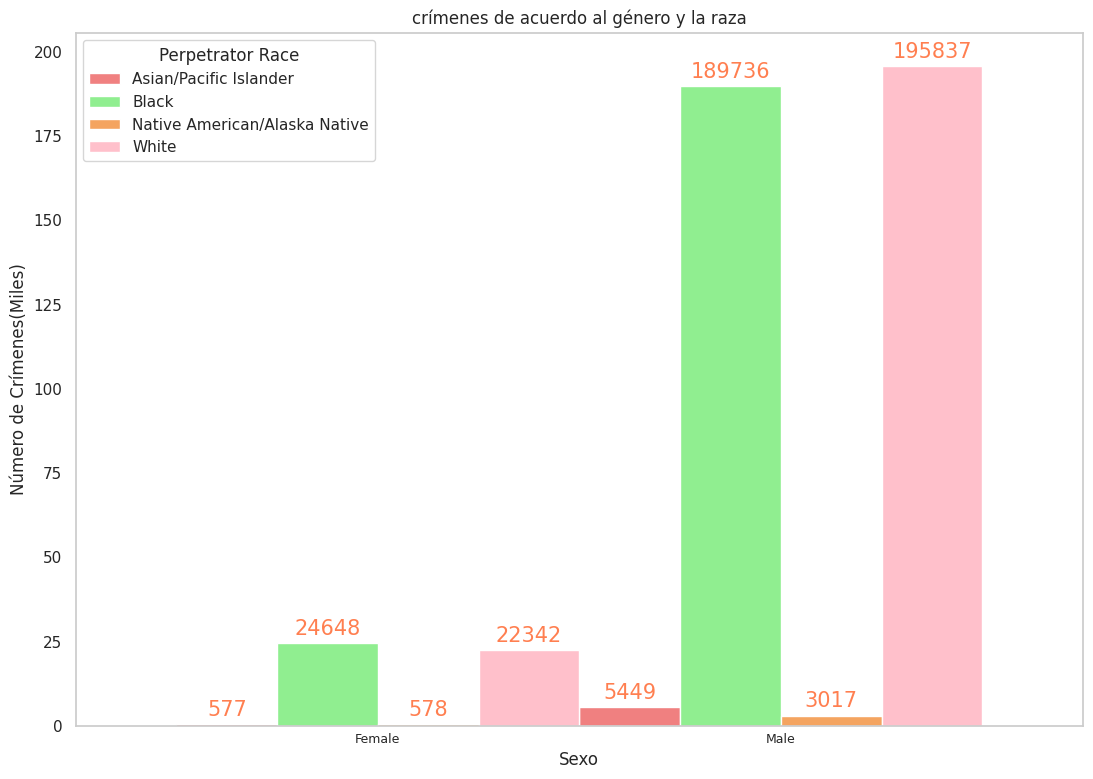

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

#DataFrame se llama 'Total_datoscrime_race'
Total_datoscrime_race = datoscrime[(datoscrime['Perpetrator Race'] !='Unknown') & (datoscrime['Perpetrator Sex'] !='Unknown')]

# Agrupación y conteo por género y raza del perpetrador
data_race = Total_datoscrime_race.groupby(['Perpetrator Sex', 'Perpetrator Race']).size().unstack()

# Colores personalizados
colors = ['lightcoral', 'lightgreen','sandybrown', 'pink']


#Reducir el tamaño de la fuente de las etiquetas:
for container in ax.containers:
    ax.bar_label(container, fontsize=5, color='black', weight='normal', label_type='edge', padding=3)

#Ajustar el tamaño de la figura
fig, ax = plt.subplots(figsize=(13, 9))  # Puedes ajustar el tamaño de la figura según tus preferencias
data_race.plot(kind='bar', width=1, color=colors, ax=ax)

# Añade etiquetas de estado en orientación vertical
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=9, va='center')

# Desactiva el grid
ax.grid(False)

# Personaliza el eje Y para mostrar valores en formato abreviado (sin miles)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x/1000:.0f}"))

# Añadir etiquetas a la derecha de las barras
for container in ax.containers:
    ax.bar_label(container, fontsize=15, color='coral', weight='normal', padding=3)


plt.title("crímenes de acuerdo al género y la raza")
plt.xlabel("Sexo")
plt.ylabel("Número de Crímenes(Miles)")
plt.show()

3)	Graficar los crímenes hispanos según el tipo de asesinato.

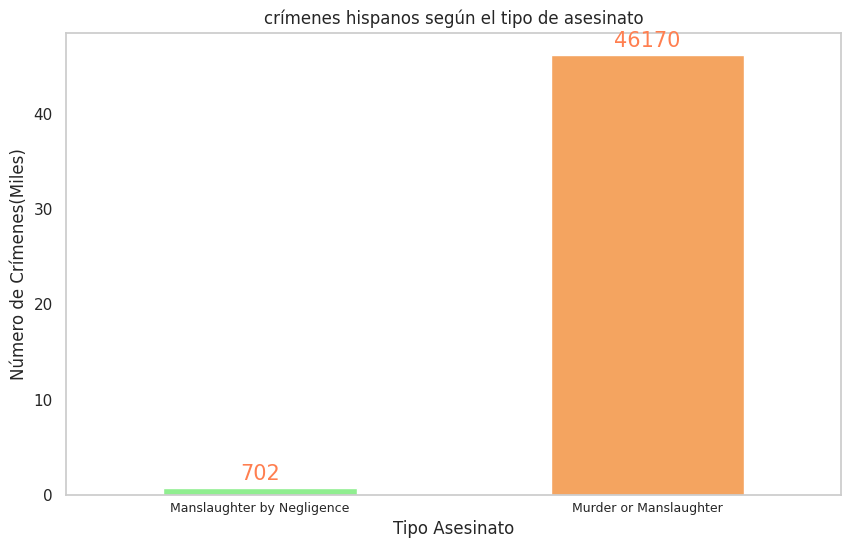

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

#DataFrame se llama 'total_datoscrime_hispanic'
total_datoscrime_hispanic = datoscrime[datoscrime['Perpetrator Ethnicity'] == 'Hispanic']

# Agrupación y conteo por tipo de asesinato
data_his = total_datoscrime_hispanic.groupby('Crime Type').size()

# Colores personalizados
colors = ['lightgreen','sandybrown']


#Reducir el tamaño de la fuente de las etiquetas:
for container in ax.containers:
    ax.bar_label(container, fontsize=5, color='black', weight='normal', label_type='edge', padding=3)

#Ajustar el tamaño de la figura
fig, ax = plt.subplots(figsize=(10, 6))  # Puedes ajustar el tamaño de la figura según tus preferencias
data_his.plot(kind='bar', width=0.5, color=colors, ax=ax)

# Añade etiquetas de estado en orientación vertical
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=9, va='center')

# Desactiva el grid
ax.grid(False)

# Personaliza el eje Y para mostrar valores en formato abreviado (sin miles)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x/1000:.0f}"))

# Añadir etiquetas a la derecha de las barras
for container in ax.containers:
    ax.bar_label(container, fontsize=15, color='coral', weight='normal', padding=3)


plt.title("crímenes hispanos según el tipo de asesinato")
plt.xlabel("Tipo Asesinato")
plt.ylabel("Número de Crímenes(Miles)")
plt.show()

4)	Graficar las víctimas por tipo raza.

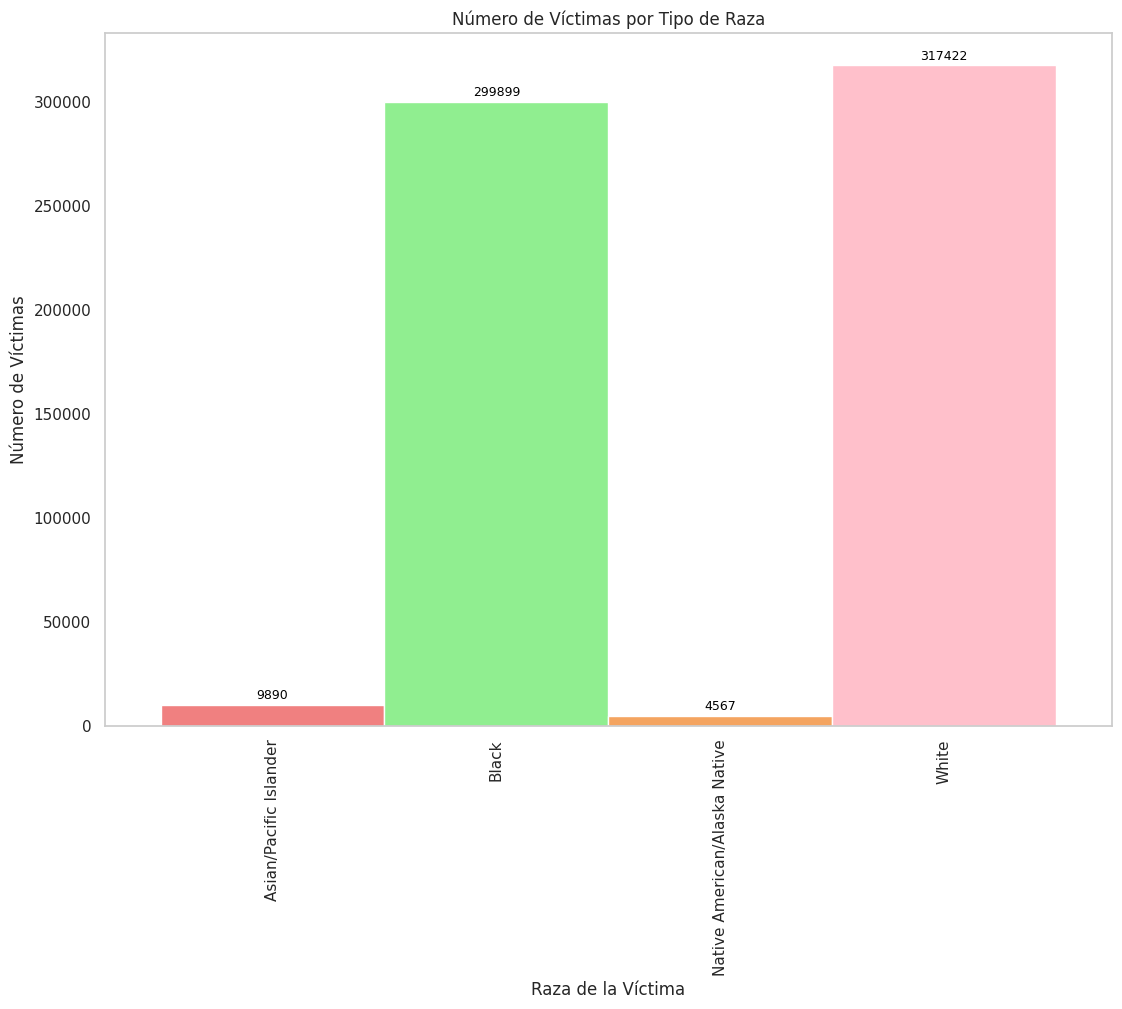

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
#DataFrame se llama 'total_datoscrime_hispanic'
total_datoscrime_race_ = datoscrime[datoscrime['Victim Race'] !='Unknown']
# Agrupación y conteo por tipo de raza de la víctima
data = total_datoscrime_race_.groupby('Victim Race').size()


# Colores personalizados
colors = ['lightcoral', 'lightgreen','sandybrown', 'pink']

#_
fig, ax = plt.subplots(figsize=(13, 9))  # Tamaño de la figura

# Gráfico de barras con etiquetas
bars = data.plot(kind='bar', width=1, color=colors, ax=ax, grid=False)

# Añadir etiquetas a las barras
for bar in bars.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 7),
                textcoords='offset points')

# Agregar cuadro de leyendas
#legend_labels = ['Asian/Pacific Islander', 'Black', 'Native American / Alaska Native', 'White']  # Reemplaza con las etiquetas deseadas
#ax.legend(legend_labels, title='Legend', loc='upper right')

plt.title("Número de Víctimas por Tipo de Raza")
plt.xlabel("Raza de la Víctima")
plt.ylabel("Número de Víctimas")
plt.show()

#_



# Gráfico de barras
#Ajustar el tamaño de la figura
#fig, ax = plt.subplots(figsize=(13, 9))  # Puedes ajustar el tamaño de la figura según tus preferencias
#data.plot(kind='bar', width=1, color=colors, ax=ax, grid= False)
#plt.title("Número de Víctimas por Tipo de Raza")
#plt.xlabel("Raza de la Víctima")
#plt.ylabel("Número de Víctimas")
#plt.show()


5)	Graficar las víctimas por tipo de asesinato.

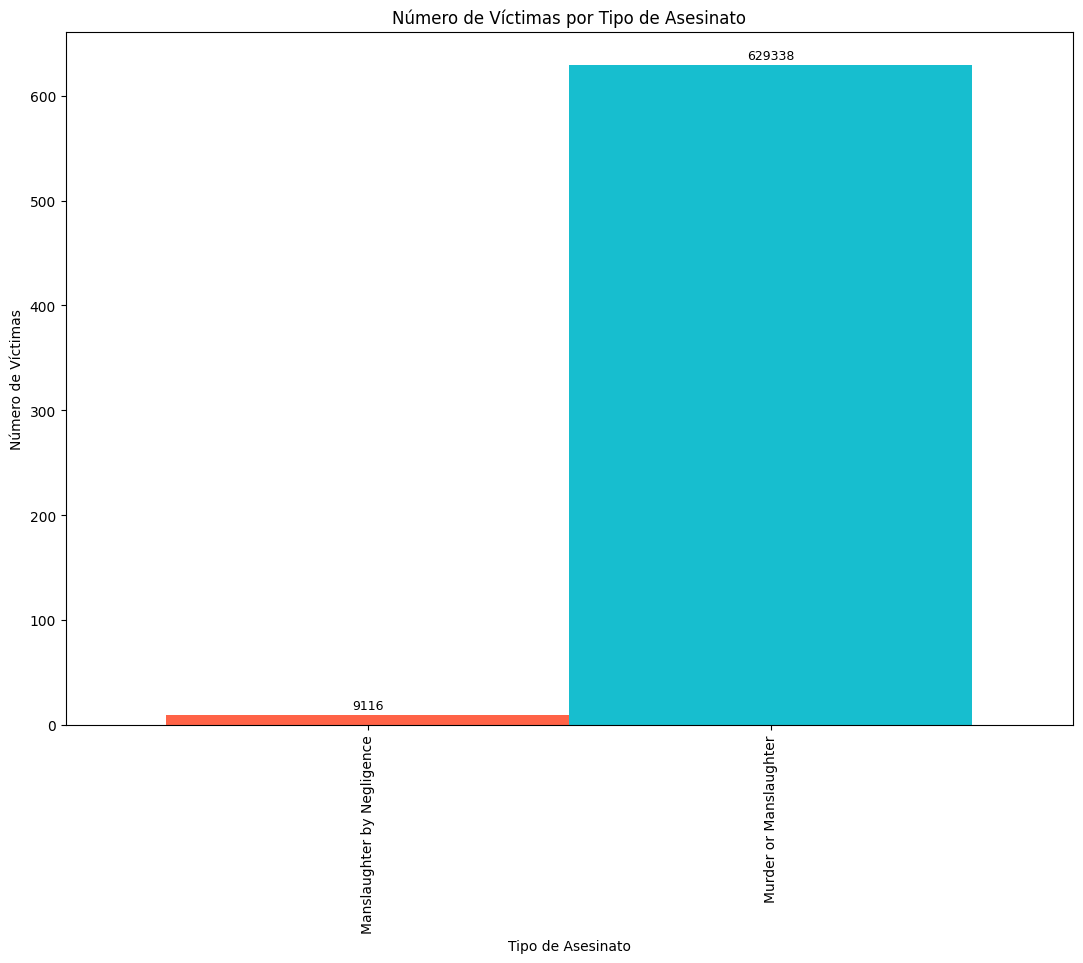

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

#DataFrame se llama 'total_datoscrime_hispanic'
total_datoscrime_crieme = datoscrime[datoscrime['Crime Type'] !='Unknown']
# Agrupación y conteo por tipo de asesinato
data = total_datoscrime_crieme.groupby('Crime Type').size()

# Gráfico de barras

# Colores personalizados
colors = ['tomato', 'tab:cyan']

#_
fig, ax = plt.subplots(figsize=(13, 9))  # Tamaño de la figura

# Gráfico de barras con etiquetas
bars = data.plot(kind='bar', width=1, color=colors, ax=ax, grid=False)


# Personaliza el eje Y para mostrar valores en formato abreviado (sin miles)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x/1000:.0f}"))

#Etiquetas
for bar in bars.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 7),
                textcoords='offset points')

plt.title("Número de Víctimas por Tipo de Asesinato")
plt.xlabel("Tipo de Asesinato")
plt.ylabel("Número de Víctimas")
plt.show()